# K Means Clustering Algorithm

In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv("kmeans_income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [18]:
scaler= MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"]= scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"]= scaler.transform(df[["Age"]])

In [19]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [20]:
kmean= KMeans(n_clusters=3)
y_predicted= kmean.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [22]:
df["cluster"]=y_predicted

In [24]:
kmean.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

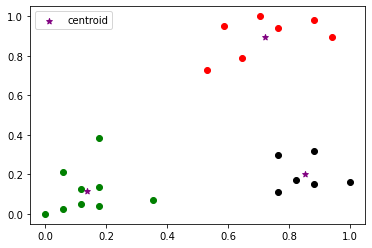

In [28]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]

plt.scatter(df1.Age, df1["Income($)"], color="green")
plt.scatter(df2.Age, df2["Income($)"], color="red")
plt.scatter(df3.Age, df3["Income($)"], color="black")

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.legend()

In [30]:
sse = []
uzunluk = range(1,10)

for k in uzunluk:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\ispir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


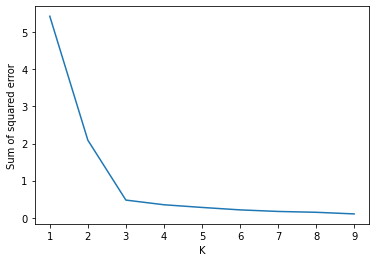

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(uzunluk,sse)

### Exercise

In [33]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [34]:
iris= load_iris()

In [35]:
df2=pd.DataFrame(iris.data, columns=iris.feature_names)
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df2["flower"]=iris.target
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df2.drop(["sepal length (cm)","sepal width (cm)","flower"],axis="columns",inplace=True)

In [39]:
sse2 = []
uzunluk2 = range(1,10)

for k in uzunluk2:
    km2 = KMeans(n_clusters=k)
    km2.fit(df2[['petal length (cm)','petal width (cm)']])
    sse2.append(km2.inertia_)

C:\Users\ispir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


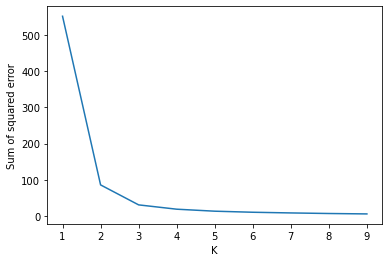

In [40]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(uzunluk2,sse2)

In [49]:
k_mean=KMeans(n_clusters=3)
ypre= k_mean.fit_predict(df2[['petal length (cm)','petal width (cm)']])
ypre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
df2['cluster']=ypre
df2

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [51]:
df.cluster.unique()

array([0, 1, 2])

In [52]:
df_1 = df2[df2.cluster==0]
df_2 = df2[df2.cluster==1]
df_3 = df2[df2.cluster==2]

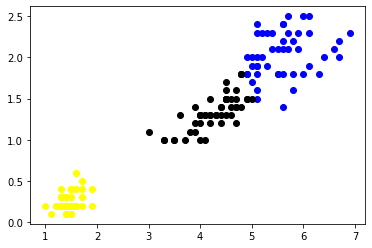

In [53]:
plt.scatter(df_1['petal length (cm)'],df_1['petal width (cm)'],color='blue')
plt.scatter(df_2['petal length (cm)'],df_2['petal width (cm)'],color='yellow')
plt.scatter(df_3['petal length (cm)'],df_3['petal width (cm)'],color='black')

### Resim sıkıştırma denemesi

import cv2
from sklearn.cluster import KMeans
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

img = cv2.imread('a.jpg')
img_size = img.shape

##### Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

##### Run the Kmeans algorithm
km = KMeans(n_clusters=50)
km.fit(X)

##### Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 3, 255)

##### Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

##### Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();